In [1]:
import librosa
import numpy as np
import librosa.display 
import matplotlib.pyplot as plt


In [2]:
y, sr = librosa.load('65-orig_20201005-argumentdelivery.mp3', offset = 662.715, duration = 676.855 - 662.715)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
#pYIN

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

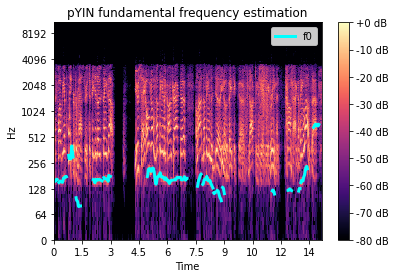

In [4]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [5]:
#Compute a chromagram from a waveform or power spectrogram.

S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.6515097 , 0.5037616 , 0.23896384, ..., 1.        , 0.8494282 ,
        0.8128183 ],
       [0.55496347, 0.46100238, 0.26387572, ..., 0.7989932 , 0.6356692 ,
        0.7285444 ],
       [0.45758128, 0.41312015, 0.28434026, ..., 0.6159597 , 0.45829576,
        0.49570233],
       ...,
       [0.5328835 , 0.35709584, 0.18040322, ..., 0.6908268 , 0.58545476,
        0.50928336],
       [0.42520115, 0.3291064 , 0.2531115 , ..., 0.5966537 , 0.4828666 ,
        0.529457  ],
       [0.4936551 , 0.37800273, 0.2676675 , ..., 0.8682445 , 0.6942284 ,
        0.67964935]], dtype=float32)

[Text(0.5, 1.0, 'Chromagram')]

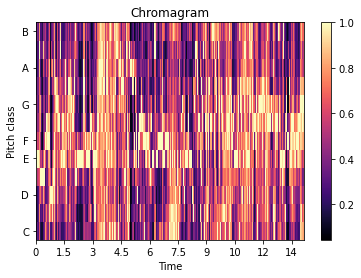

In [6]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [7]:
#Constant-Q chromagram

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,
                                          n_chroma=12, n_fft=4096)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

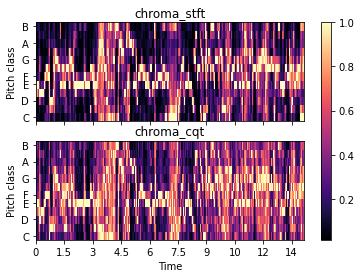

In [8]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

In [9]:
#Computes the chroma variant “Chroma Energy Normalized” (CENS)

chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

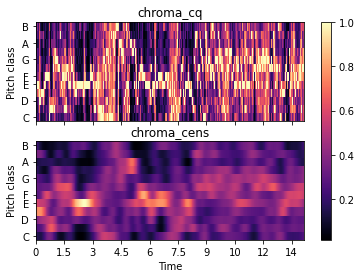

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

In [11]:
#Compute a mel-scaled spectrogram.

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

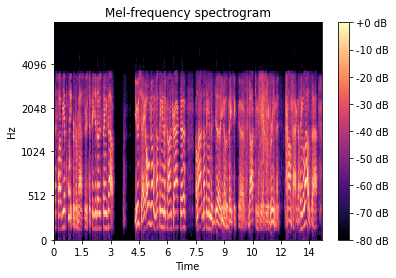

In [12]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'MFCC')]

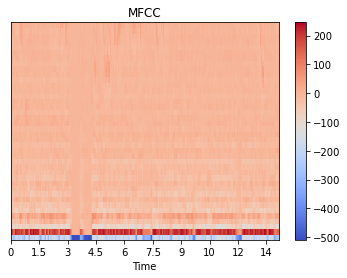

In [13]:
#Mel-frequency cepstral coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

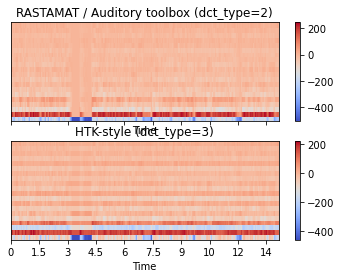

In [14]:
#mfcc - Compare different DCT bases


m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

[Text(0.5, 1.0, 'log Power spectrogram')]

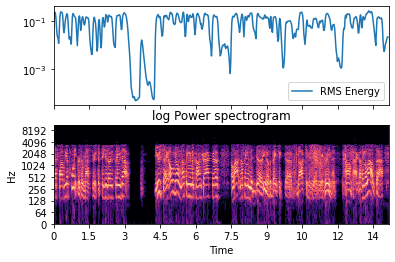

In [15]:
#Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.

S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

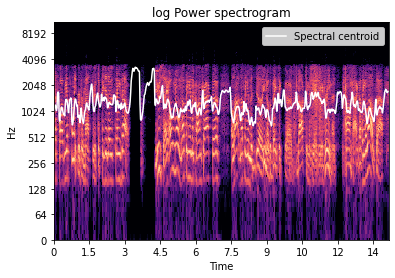

In [16]:
#Compute the spectral centroid.

cent = librosa.feature.spectral_centroid(y=y, sr=sr)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

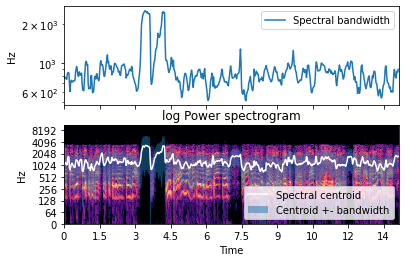

In [17]:
#Compute p’th-order spectral bandwidth.

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y)) #From spectrogram input

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

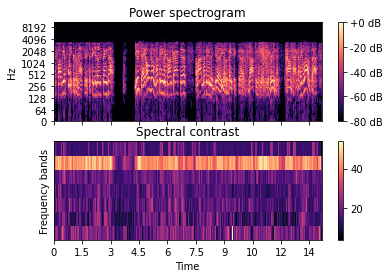

In [18]:
#Compute spectral contrast

S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [19]:
#Compute spectral flatness

flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[3.17975246e-05, 1.12113712e-05, 6.73808415e-07, 3.87963382e-07,
        6.97348071e-07, 2.13136809e-06, 6.53392772e-06, 1.43974412e-05,
        1.49422422e-05, 2.62377816e-05, 3.27174939e-06, 4.56656778e-07,
        2.75225176e-07, 2.89222072e-07, 2.75668128e-07, 2.26855022e-07,
        2.57502705e-07, 8.39637039e-07, 3.08370522e-06, 3.91796584e-06,
        1.57036982e-06, 1.38014559e-06, 1.17099819e-06, 1.34442189e-06,
        1.22910535e-06, 8.89410614e-07, 9.65380877e-07, 3.59463411e-06,
        1.76804624e-05, 2.94279198e-05, 1.37020816e-05, 1.45058430e-05,
        2.06871955e-05, 1.64604921e-06, 2.66591883e-07, 1.52228282e-07,
        2.54624183e-07, 6.38705615e-07, 9.43071996e-07, 1.14742545e-06,
        8.01745557e-07, 1.48246750e-06, 1.03956818e-05, 5.26468357e-05,
        8.71365228e-06, 1.20088441e-06, 3.71433487e-07, 2.75934752e-07,
        5.74115916e-07, 3.15384068e-06, 2.94631559e-06, 1.10307201e-06,
        5.89293450e-07, 4.92991319e-07, 6.38921676e-07, 9.156729

[Text(0.5, 1.0, 'log Power spectrogram')]

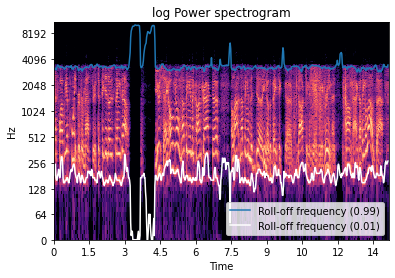

In [20]:
#Compute roll-off frequency.

# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=y, sr=sr)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
rolloff_min

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

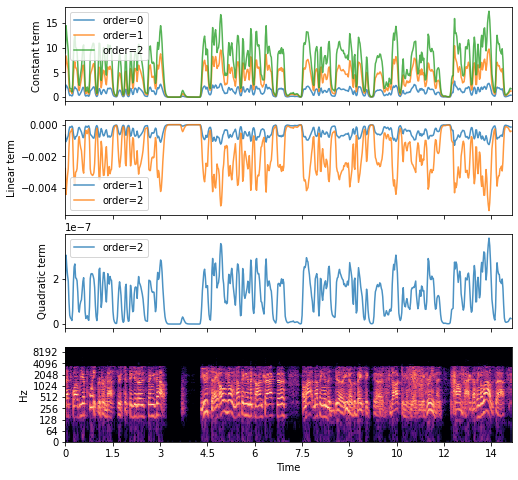

In [21]:
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.

S = np.abs(librosa.stft(y))

#Fit a degree-0 polynomial (constant) to each frame
p0 = librosa.feature.poly_features(S=S, order=0)

#Fit a linear polynomial to each frame
p1 = librosa.feature.poly_features(S=S, order=1)

#Fit a quadratic to each frame
p2 = librosa.feature.poly_features(S=S, order=2)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

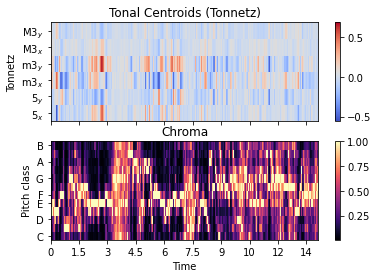

In [22]:
#Computes the tonal centroid features (tonnetz)

y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [23]:
#Compute the zero-crossing rate of an audio time series.

librosa.feature.zero_crossing_rate(y)

array([[0.04296875, 0.05712891, 0.07177734, 0.05908203, 0.05908203,
        0.06201172, 0.07373047, 0.09375   , 0.10644531, 0.10400391,
        0.08935547, 0.06835938, 0.05566406, 0.05517578, 0.05859375,
        0.05712891, 0.05664062, 0.0546875 , 0.04931641, 0.04248047,
        0.03710938, 0.03222656, 0.03076172, 0.03173828, 0.03369141,
        0.03466797, 0.04394531, 0.04882812, 0.05664062, 0.07666016,
        0.08056641, 0.09912109, 0.09277344, 0.07080078, 0.05566406,
        0.03027344, 0.02587891, 0.02587891, 0.02734375, 0.02880859,
        0.03125   , 0.04736328, 0.06542969, 0.06542969, 0.06494141,
        0.05175781, 0.03466797, 0.04003906, 0.04443359, 0.05126953,
        0.05175781, 0.04638672, 0.04394531, 0.03564453, 0.03417969,
        0.03417969, 0.03808594, 0.04345703, 0.05371094, 0.05810547,
        0.05273438, 0.05078125, 0.04541016, 0.04980469, 0.06396484,
        0.07714844, 0.10253906, 0.13574219, 0.15966797, 0.18847656,
        0.17382812, 0.13085938, 0.09277344, 0.04

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


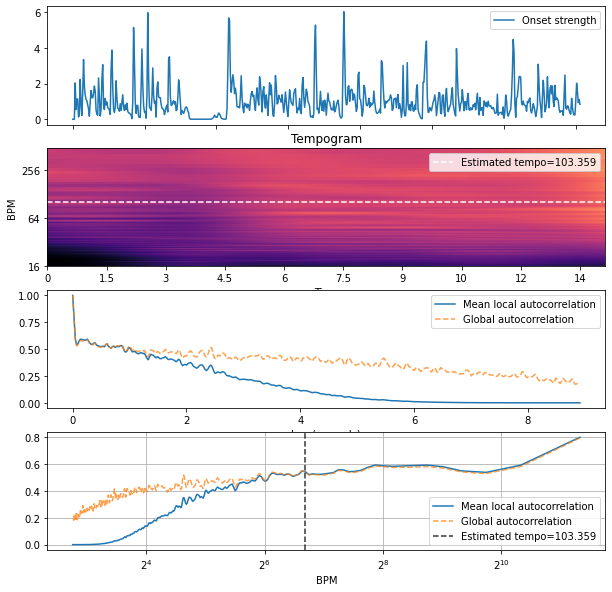

In [24]:
#Compute the tempogram: local autocorrelation of the onset strength envelope.

hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

[Text(0.5, 1.0, 'Autocorrelation tempogram')]

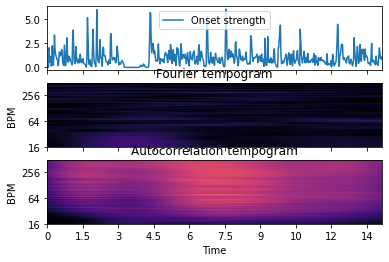

In [25]:
#Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope.

hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr,
                                              hop_length=hop_length)
# Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                         hop_length=hop_length, norm=None)

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(librosa.times_like(oenv), oenv, label='Onset strength')
ax[0].legend(frameon=True)
ax[0].label_outer()
librosa.display.specshow(np.abs(tempogram), sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma',
                         ax=ax[1])
ax[1].set(title='Fourier tempogram')
ax[1].label_outer()
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[2])
ax[2].set(title='Autocorrelation tempogram')